In [1]:
import pandas as pd
import pickle
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def condition_sort(x):
    return "+".join(sorted(x.split("+")))

# Load the processed scRNA-seq dataset as Anndata
data_path = "../../data/Data_GEARS/norman/perturb_processed.h5ad"
adata = sc.read(data_path)
adata.obs["condition"] = adata.obs["condition"].astype(str).apply(lambda x: condition_sort(x)).astype("category")  # fmt: skip
adata.uns = {}
adata.obs.drop("condition_name", axis=1, inplace=True)

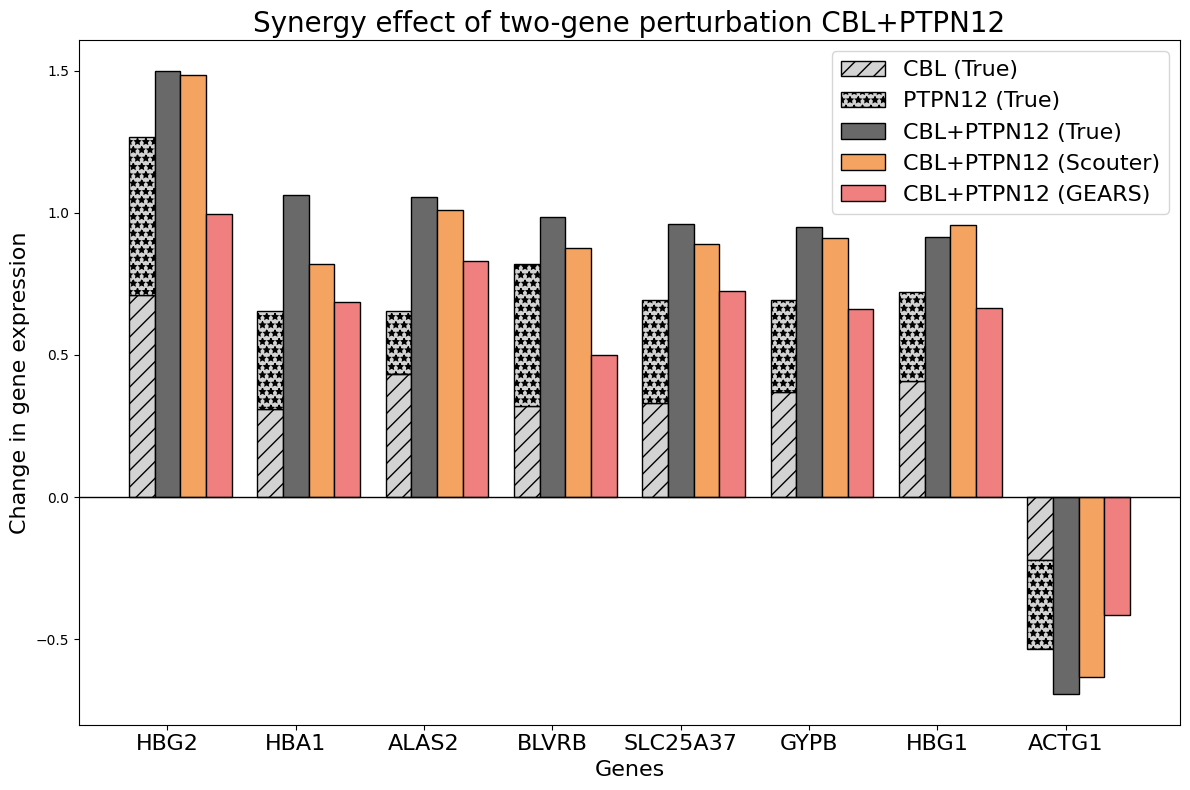

In [3]:
############################## Synergy ###########################################
pert_ab = "CBL+PTPN12"
scouter_pred = pickle.load(open("../../results/Scouter/Scouter_norman_4.pkl", "rb"))
degs_idx = scouter_pred[pert_ab]['DE_idx']
degs_names = scouter_pred[pert_ab]['DE_name']
ctrl = scouter_pred[pert_ab]['Ctrl'].mean(axis=0)
scouter_ab = scouter_pred[pert_ab]['Pred'].mean(axis=0) - ctrl

with open("../../results/GEARS/GEARS_norman_combo_seen1_1.pkl", "rb") as f:
    gears_pred = pickle.load(f)
gears_ab = gears_pred[pert_ab]['Pred'][degs_idx] - ctrl

pert_a, pert_b = (i + "+ctrl" for i in pert_ab.split("+"))
true_a = adata[adata.obs["condition"] == pert_a].X[:, degs_idx].toarray().mean(axis=0) - ctrl
true_b = adata[adata.obs["condition"] == pert_b].X[:, degs_idx].toarray().mean(axis=0) - ctrl
true_ab = adata[adata.obs["condition"] == pert_ab].X[:, degs_idx].toarray().mean(axis=0) - ctrl

change_df = pd.DataFrame(
    {
        "true_a": true_a,
        "true_b": true_b,
        "true_ab": true_ab,
        "scouter_ab": scouter_ab,
        "gears_ab": gears_ab,
    }, index=degs_names
)

plot_genes = (change_df.true_ab.abs() - change_df[['true_a', 'true_b']].sum(axis=1).abs()).sort_values(ascending=False).head(8).index
plot_df = change_df.loc[plot_genes]
plot_df = plot_df.sort_values(by='true_ab', ascending=False)
n = plot_df.shape[0]
ind = np.arange(n)
width = 0.2

b_bottom = np.where((plot_df.true_a*plot_df.true_b) > 0, plot_df.true_a, 0)
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(ind - width, plot_df.true_a, width, color='lightgrey', hatch='//', label=pert_a.strip("+ctrl")+' (True)', edgecolor="black")
ax.bar(ind - width, plot_df.true_b, width, bottom=b_bottom, color='lightgrey', hatch='**', label=pert_b.strip("+ctrl")+' (True)', edgecolor="black")
ax.bar(ind, plot_df.true_ab, width, color='dimgrey', label=pert_ab+' (True)', edgecolor="black")
ax.bar(ind + width, plot_df.scouter_ab, width, color='sandybrown', label=pert_ab+' (Scouter)', edgecolor="black")
ax.bar(ind + width*2, plot_df.gears_ab, width, color='lightcoral', label=pert_ab+' (GEARS)', edgecolor="black")
ax.axhline(0, color='black', linewidth=1, linestyle='-')
ax.set_xticks(ind)
ax.set_xticklabels(plot_df.index, rotation=0, ha='center', fontsize=16)
ax.set_xlabel("Genes", fontsize=16)
ax.set_ylabel("Change in gene expression", fontsize=16)
ax.set_title("Synergy effect of two-gene perturbation CBL+PTPN12", fontsize=20)
ax.legend(fontsize=16)
plt.tight_layout()
plt.show()

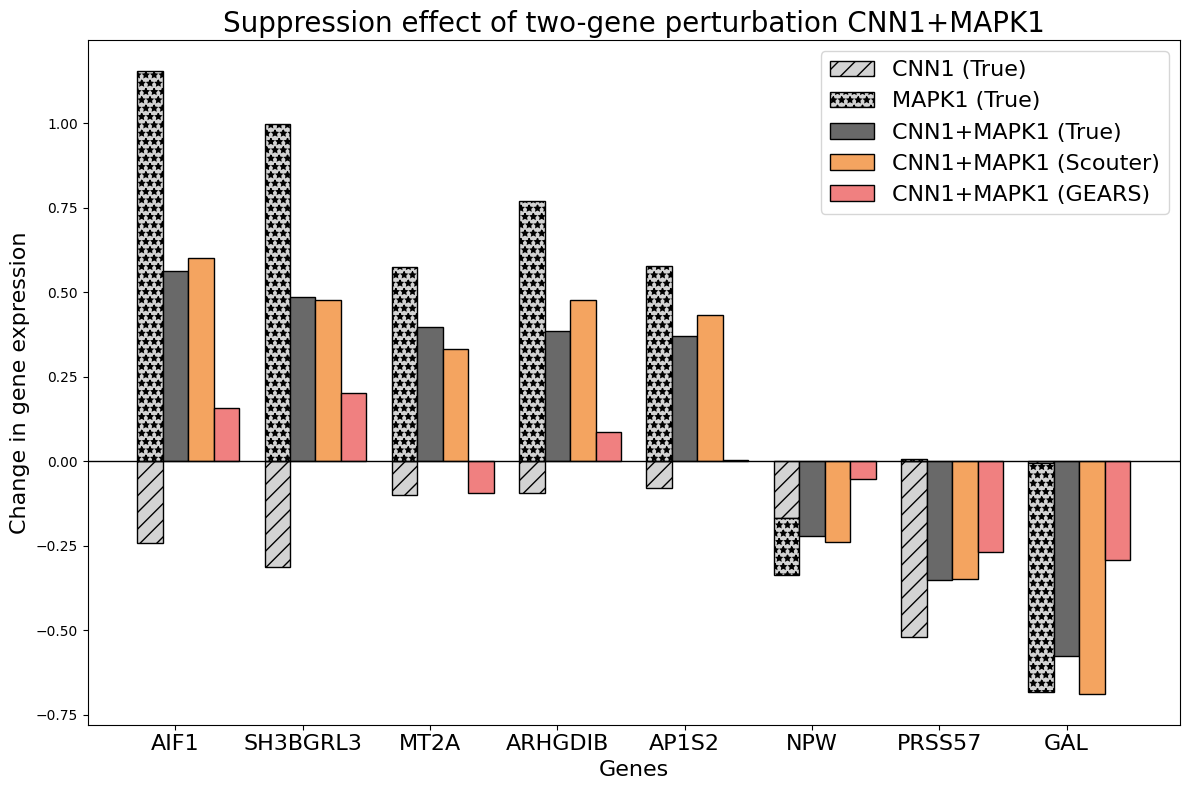

In [4]:
############################## suppression ###########################################
pert_ab = "CNN1+MAPK1"
scouter_pred = pickle.load(open("../../results/Scouter/Scouter_norman_3.pkl", "rb"))
degs_idx = scouter_pred[pert_ab]['DE_idx']
degs_names = scouter_pred[pert_ab]['DE_name']
ctrl = scouter_pred[pert_ab]['Ctrl'].mean(axis=0)
scouter_ab = scouter_pred[pert_ab]['Pred'].mean(axis=0) - ctrl

with open("../../results/GEARS/GEARS_norman_combo_seen0_2.pkl", "rb") as f:
    gears_pred = pickle.load(f)
gears_ab = gears_pred[pert_ab]['Pred'][degs_idx] - ctrl

pert_a, pert_b = (i + "+ctrl" for i in pert_ab.split("+"))
true_a = adata[adata.obs["condition"] == pert_a].X[:, degs_idx].toarray().mean(axis=0) - ctrl
true_b = adata[adata.obs["condition"] == pert_b].X[:, degs_idx].toarray().mean(axis=0) - ctrl
true_ab = adata[adata.obs["condition"] == pert_ab].X[:, degs_idx].toarray().mean(axis=0) - ctrl

change_df = pd.DataFrame(
    {
        "true_a": true_a,
        "true_b": true_b,
        "true_ab": true_ab,
        "scouter_ab": scouter_ab,
        "gears_ab": gears_ab,
    }, index=degs_names
)

plot_genes = (change_df.true_ab.abs() - change_df[['true_a', 'true_b']].sum(axis=1).abs()).sort_values(ascending=True).head(8).index
plot_df = change_df.loc[plot_genes]
plot_df = plot_df.sort_values(by='true_ab', ascending=False)
n = plot_df.shape[0]
ind = np.arange(n)
width = 0.2

b_bottom = np.where((plot_df.true_a*plot_df.true_b) > 0, plot_df.true_a, 0)
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(ind - width, plot_df.true_a, width, color='lightgrey', hatch='//', label=pert_a.strip("+ctrl")+' (True)', edgecolor="black")
ax.bar(ind - width, plot_df.true_b, width, bottom=b_bottom, color='lightgrey', hatch='**', label=pert_b.strip("+ctrl")+' (True)', edgecolor="black")
ax.bar(ind, plot_df.true_ab, width, color='dimgrey', label=pert_ab+' (True)', edgecolor="black")
ax.bar(ind + width, plot_df.scouter_ab, width, color='sandybrown', label=pert_ab+' (Scouter)', edgecolor="black")
ax.bar(ind + width*2, plot_df.gears_ab, width, color='lightcoral', label=pert_ab+' (GEARS)', edgecolor="black")
ax.axhline(0, color='black', linewidth=1, linestyle='-')
ax.set_xticks(ind)
ax.set_xticklabels(plot_df.index, rotation=0, ha='center', fontsize=16)
ax.set_xlabel("Genes", fontsize=16)
ax.set_ylabel("Change in gene expression", fontsize=16)
ax.set_title("Suppression effect of two-gene perturbation CNN1+MAPK1", fontsize=20)
ax.legend(fontsize=16)
plt.tight_layout()
plt.show()

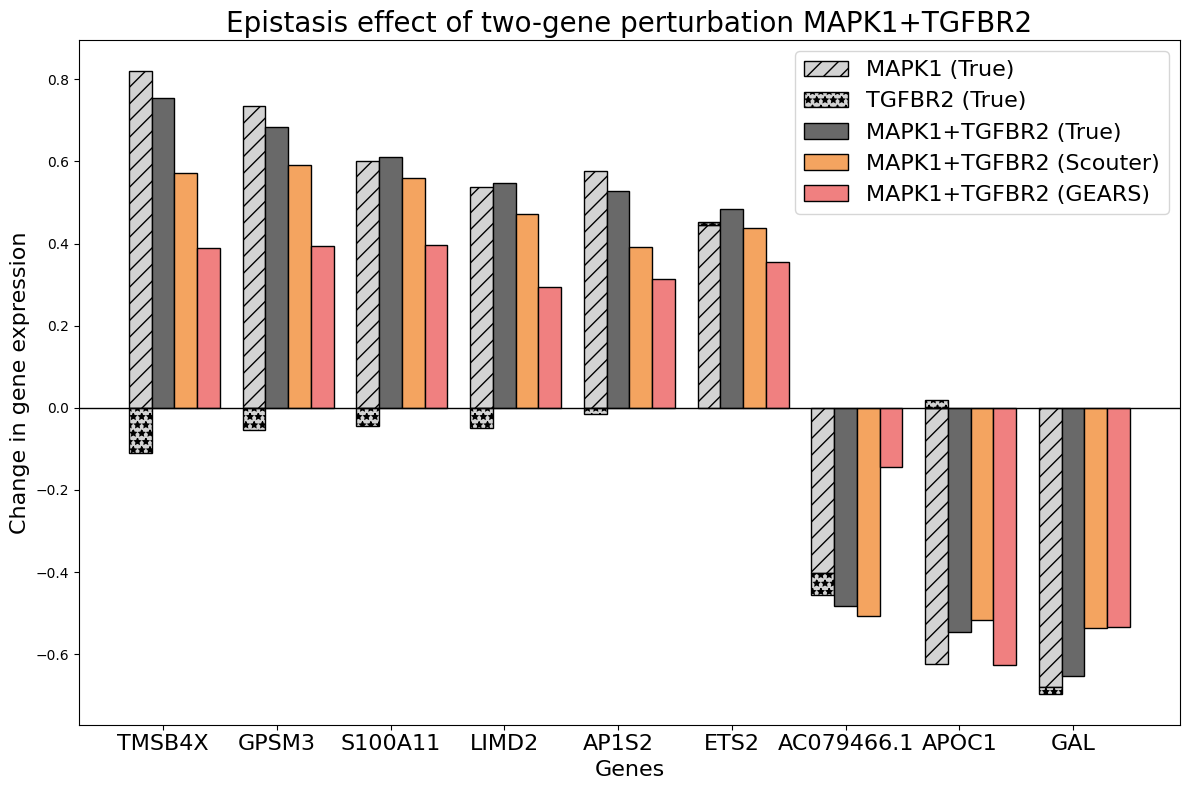

In [5]:
############################## epistasis ###########################################
pert_ab = "MAPK1+TGFBR2"
scouter_pred = pickle.load(open("../../results/Scouter/Scouter_norman_4.pkl", "rb"))
degs_idx = scouter_pred[pert_ab]['DE_idx']
degs_names = scouter_pred[pert_ab]['DE_name']
ctrl = scouter_pred[pert_ab]['Ctrl'].mean(axis=0)
scouter_ab = scouter_pred[pert_ab]['Pred'].mean(axis=0) - ctrl

with open("../../results/GEARS/GEARS_norman_combo_seen1_4.pkl", "rb") as f:
    gears_pred = pickle.load(f)
gears_ab = gears_pred[pert_ab]['Pred'][degs_idx] - ctrl

pert_a, pert_b = (i + "+ctrl" for i in pert_ab.split("+"))
true_a = adata[adata.obs["condition"] == pert_a].X[:, degs_idx].toarray().mean(axis=0) - ctrl
true_b = adata[adata.obs["condition"] == pert_b].X[:, degs_idx].toarray().mean(axis=0) - ctrl
true_ab = adata[adata.obs["condition"] == pert_ab].X[:, degs_idx].toarray().mean(axis=0) - ctrl

change_df = pd.DataFrame(
    {
        "true_a": true_a,
        "true_b": true_b,
        "true_ab": true_ab,
        "scouter_ab": scouter_ab,
        "gears_ab": gears_ab,
    }, index=degs_names
)

plot_genes = change_df[['true_a', 'true_b']].subtract(change_df.true_ab, axis=0).abs().min(axis=1).sort_values(ascending=True).head(9).index
plot_df = change_df.loc[plot_genes]
plot_df = plot_df.sort_values(by='true_ab', ascending=False)
n = plot_df.shape[0]
ind = np.arange(n)
width = 0.2

b_bottom = np.where((plot_df.true_a*plot_df.true_b) > 0, plot_df.true_a, 0)
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(ind - width, plot_df.true_a, width, color='lightgrey', hatch='//', label=pert_a.strip("+ctrl")+' (True)', edgecolor="black")
ax.bar(ind - width, plot_df.true_b, width, bottom=b_bottom, color='lightgrey', hatch='**', label=pert_b.strip("+ctrl")+' (True)', edgecolor="black")
ax.bar(ind, plot_df.true_ab, width, color='dimgrey', label=pert_ab+' (True)', edgecolor="black")
ax.bar(ind + width, plot_df.scouter_ab, width, color='sandybrown', label=pert_ab+' (Scouter)', edgecolor="black")
ax.bar(ind + width*2, plot_df.gears_ab, width, color='lightcoral', label=pert_ab+' (GEARS)', edgecolor="black")
ax.axhline(0, color='black', linewidth=1, linestyle='-')
ax.set_xticks(ind)
ax.set_xticklabels(plot_df.index, rotation=0, ha='center', fontsize=16)
ax.set_xlabel("Genes", fontsize=16)
ax.set_ylabel("Change in gene expression", fontsize=16)
ax.set_title("Epistasis effect of two-gene perturbation MAPK1+TGFBR2", fontsize=20)
ax.legend(fontsize=16, loc='upper right')
plt.tight_layout()
plt.show()